# CSCI 2820 - LINEAR ALGEBRA - FALL 2024

Make sure you fill in any place that says `CODE SOLUTION HERE` or "CODE SOLUTION HERE", as well as your NAMES below:

In [1]:
NAMES = ""

# FINAL PROJECT (Option 1):  Approximating Eigenvalues and Eigenvectors and Applications in Discrete Dynamical Systems


In [2]:
## This is a Jupyter notebook for the CU Linear Algebra Final Project. 
## Professor Divya E. Vernerey and Arjun Peroor
## Fall 2024

In this first section we look at three methods that can be used to approximate the eigenvalues of a matrix $A$.  Although it is possible to find the exact eigenvalues for small matrices, the approach is impractical for larger matrices. Read Lay section 5.8 for more detailed information.

Most introductory textbooks demonstrate a direct way to compute eigenvalues of an $n\times n$ matrix $A$ by computing roots of an associated $n$th degree polynomial, known as the *characteristic polynomial*.  For example, suppose $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rr} a & b  \\ c & d \end{array}\right]
\end{equation}
$$

The eigenvalues of $A$ are solutions to the quadratic equation $\lambda^2 - (a+d)\lambda + ad-bc = 0$, which can be written explicitly in terms of $a$, $b$, $c$, and $d$ using the quadratic formula.  The challenges with larger matrices are that the polynomial is more difficult to construct, and the roots cannot be easily found with a formula.

The algorithms we describe in this section are iterative methods.  They generate a sequence of vectors $\{X^{(1)}, X^{(2)}, X^{(3)}, ... \}$ that approach a true eigenvector of the matrix under consideration.  An approximation of the corresponding eigenvalue can then be computed by multiplying the approximate eigenvector by $A$. 

## Power method (method 1)

The first algorithm we introduce for approximating eigenvalues is known as the **Power Method**.  This method generates a sequence of vectors by repeated matrix multiplication.  Under suitable conditions, the sequence of vectors approaches the eigenvector associated with the eigenvalue that is largest in absolute value.    

For the simplest explanation, suppose that $A$ is an $n\times n$ diagonalizable matrix with eigenvectors $\{V_1, V_2, ... V_n\}$, and that $\lambda_1$ is the eigenvalue of $A$ that is largest in absolute value.  To begin the Power Method, we choose any nonzero vector and label it $X^{(0)}$.  We can express $X^{(0)}$  as a linear combination of the eigenvectors since they form a basis for $\mathbb{R}^n$.

$$
\begin{equation}
X^{(0)} = c_1V_1 + c_2V_2 + ... c_nV_n
\end{equation}
$$

We now form a sequence of vectors $X^{(1)}$, $X^{(2)}$, $X^{(3)}$, ..., by setting $X^{(m)}= AX^{(m-1)}$.  Each of these vectors is also easly expressed in terms of the eigenvectors.

$$
\begin{eqnarray*}
X^{(1)} = AX^{(0)} & = & c_1AV_1 + c_2AV_2 + ... c_nAV_n \\
                   & = & c_1\lambda_1V_1 + c_2\lambda_2V_2 + ... c_n\lambda_nV_n \\
X^{(2)} = AX^{(1)} & = & c_1\lambda_1AV_1 + c_2\lambda_2AV_2 + ... c_n\lambda_nAV_n \\
                   & = & c_1\lambda_1^2V_1 + c_2\lambda_2^2V_2 + ... c_n\lambda_n^2V_n \\
                   & \vdots & \\
X^{(m)} = AX^{(m-1)} & = & c_1\lambda_1^{m-1}AV_1 + c_2\lambda_2^{m-1}AV_2 + ... c_n\lambda_n^{m-1}AV_n \\
                   & = & c_1\lambda_1^mV_1 + c_2\lambda_2^mV_2 + ... c_n\lambda_n^mV_n 
\end{eqnarray*}
$$

In the expression for $X^{(m)}$, we can then factor out $\lambda_1^m$ to understand what happens as $m$ gets large.

$$
\begin{equation}
X^{(m)} =  \lambda_1^m\left(c_1V_1 + c_2\left(\frac{\lambda_2}{\lambda_1}\right)^mV_2 + ... c_n\left(\frac{\lambda_n}{\lambda_1}\right)^mV_n\right) 
\end{equation}
$$

If $|\lambda_1| > |\lambda_i|$ for all $i\neq 1$, then $|\lambda_i/\lambda_1|< 1$ and $(\lambda_i/\lambda_1)^m$ will approach zero as $m$ gets large.  This means that if we repeatedly multiply a vector by the matrix $A$, eventually we will get a vector that is very nearly in the direction of the eigenvector that corresponds to the $\lambda_1$. 

Let's demonstrate the calculation on the matrix shown here before we discuss the method further.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} -2 & 6 & 2 & -8 \\ -6 & 0 & 12 & 12 \\ -6 & 0 & 12 & 12 \\ -10 & 3 & 7 & 14 \end{array}\right]
\end{equation}
$$

As a matter of practicality, it is common to scale the vectors in the sequence to unit length as the Power Method is applied.  If the vectors in the sequence are not scaled, their magnitudes will grow if $\lambda_1>1$ or decay if $\lambda_1<1$.    Since all components of the vectors get divided by the same factor when the vector is scaled, this step doesn't change the ultimate behavior of the sequence.  The scaled sequence of vectors still approaches the direction of the eigenvector. 

We choose an arbitrary $X^{(0)}$ and calculate $X^{(20)}$ using the following rule.

$$
\begin{equation}
X^{(m)}=\frac{AX^{(m-1)}}{||AX^{(m-1)}||}
\end{equation}
$$

In [3]:
import numpy as np
import laguide as lag
A = np.array([[-2, 6, 2, -8],[-6, 0, 12, 12],[-6, 0, 12, 12],[-10, 3, 7, 14]])
X = np.array([[1],[0],[0],[0]])

m = 0
while (m < 20):
    X = A@X
    X = X/lag.Magnitude(X)
    m = m + 1
    
print(X)

[[ 1.57523994e-12]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]]


Now if $X$ is the eigenvector of $A$ with unit magnitude, then $|AX| = |\lambda_1X| = |\lambda_1|$.  We can therefore approximate $|\lambda_1|$ with $|AX|$.

In [4]:
print(lag.Magnitude(A@X))

24.000000000020005


It appears that 24 is an estimate for $\lambda_1$.   To determine if our calculation is correct, we can compare $AX$ with $\lambda_1X$.  

In [5]:
print(A@X - 24*X)

[[-4.09561274e-11]
 [-9.45021839e-12]
 [-9.45021839e-12]
 [-1.57509561e-11]]


Indeed the difference $AX-24X$ is small.  Note that in this case, we can even do the calculation with integer multiplication.  Notice that $X$ has 0 in the first entry and the other entries are equal.  If we set these entries to 1, the result is easy to calculate even without the aid of the computer.  (*Remember that we can change the magnitude of an eigenvector and it is still an eigenvector.*) 

$$
\begin{equation}
AX = \left[ \begin{array}{rrrr} -2 & 6 & 2 & -8 \\ -6 & 0 & 12 & 12 \\ -6 & 0 & 12 & 12 \\ -10 & 3 & 7 & 14 \end{array}\right]
\left[ \begin{array}{r} 0 \\ 1\\ 1 \\ 1 \end{array}\right] =
\left[ \begin{array}{r} 0 \\ 24\\ 24 \\ 24 \end{array}\right] = 24X
\end{equation}
$$

In practice, we do not know how many iterations we need to perform in order to get a good approximation of the eigenvector.  Instead we should specify a condition upon which we will be satisfied with the approximation and terminate the iteration.  For example, since $||AX^{(m)}||\approx \lambda_1$ and $AX^{(m)}\approx \lambda_1X^{(m)}$ we might require that $AX^{(m)} - ||AX^{(m)}||X^{(m)} < \epsilon$ for some small number $\epsilon$ known as a tolerance.  This condition ensures that $X^{(m)}$ functions roughly like an eigenvector.  It is also best to include in the code a limit on the number of iterations that will be carried out.  This ensures that the computation will eventually end, even if a satisfactory result has not yet been achieved.

In [6]:
X = np.array([[1],[0],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A@X
difference = Y - lag.Magnitude(Y)*X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))


Eigenvector is approximately:
[[ 1.65181395e-06]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]] 

Magnitude of the eigenvalue is approximately:
24.000020980823063 

Magnitude of the difference is:
4.328470441185797e-05


A more common condition to require is that $||X^{(m)} - X^{(m-1})|| < \epsilon$ for a given tolerance $\epsilon$.  This condition merely requires that the vectors in the sequence get close to one another, not that they are actually approximate an eigenvector.  

In [7]:
X = np.array([[1],[0],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = A@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))


Eigenvector is approximately:
[[ 2.64294012e-05]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]] 

Magnitude of the eigenvalue is approximately:
24.000020980823063 

Magnitude of the difference is:
8.434774776931515e-05


While the Power Method is easy to understand and apply, it does have disadvantages.  The most apparent disadvantage is that the method only applies to the largest eigenvalue.  This is not a huge detriment since applications often only require an approximation of the largest eigenvalue.  Also, as we will demonstrate below, it is possible to easily modify the method to approximate the other eigenvalues.  A more significant disadvantage is that the rate at which the sequence converges can be slow in some circumstances.  For example, we can see that if $|\lambda_1|$ is close to $|\lambda_2|$, then $|\lambda_1/\lambda_2|^m$ approaches zero more slowly as $m$ gets large.  The Power Method may fail to converge at all if $|\lambda_1| = |\lambda_2|$, which occurs if $\lambda_1 = -\lambda_2$, or if $\lambda_1$ and $\lambda_2$ are a complex conjugate pair.  Additionally, the method may perform poorly if the $V_1$ component of $X^{(0)}$ is too small.  

## Inverse power method (method 2)

The **Inverse Power Method** is a modified version of the Power Method that allows us to approximate eigenvalues that are *not the largest*.  All that is needed to make the modification is two simple facts that relate changes in a matrix to changes in the eigenvalues of that matrix.  Let's suppose that $A$ is an invertible $n\times n$ matrix with eigenvalue $\lambda$ and corresponding eigenvector $V$, so that $AV=\lambda V$.  If we multiply this equation by $A^{-1}$, we get $V=\lambda A^{-1}V$, which can then be divided by $\lambda$ to illustrate the useful fact.

$$
\begin{equation}
A^{-1}V = \frac{1}{\lambda}V
\end{equation}
$$

If $\lambda$ is an eigenvalue of $A$, then $\lambda^{-1}$ is an eigenvalue of $A^{-1}$.  Furthermore the eigenvector of $A$ is also an eigenvector of $A^{-1}$.  The important point here is that if $\lambda_n$ is the smallest eigenvalue of $A$, then $\lambda_n^{-1}$ is the *largest* eigenvector of $A^{-1}$.  If we want to approximate the smallest eigenvalue of $A$, we can just apply the Power Method to $A^{-1}$.

We demonstrate the calculation for the following $3\times 3$ matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

Again we choose an arbitrary $X^{(0)}$, and generate a sequence of vectors by multiplying by $A^{-1}$ and scaling the result to unit length.

$$
\begin{equation}
X^{(m)}=\frac{A^{-1}X^{(m-1)}}{||A^{-1}X^{(m-1)}||}
\end{equation}
$$

In [8]:
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
A_inv = lag.Inverse(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = A_inv@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(A_inv@X),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')

Eigenvector is approximately:
[[-4.47193123e-01]
 [ 6.14168469e-05]
 [-8.94437425e-01]] 

Magnitude of the eigenvalue of A inverse is approximately:
0.3333371476391265 

Magnitude of the eigenvalue of A is approximately:
2.999931351114087 



The exact value of the smallest eigenvalue of $A$ is 3, which again can be verified by calculation.

$$
\begin{equation}
AV = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\left[ \begin{array}{r} 1 \\ 0\\ 2 \end{array}\right] =
\left[ \begin{array}{r} 3 \\ 0 \\ 6 \end{array}\right] = 3V
\end{equation}
$$

In our discussion of Inverse Matrices we noted that the construction of an inverse matrix is quite expensive since it requires the solution of $n$ systems of size $n\times n$.  An alternative to constructing $A^{-1}$ and computing the  $X^{(m)}=A^{-1}X^{(m-1)}$ is to solve the system $AX^{(m)}=X^{(m-1)}$ to obtain $X^{(m)}$.  This means that we solve one $n\times n$ system for every iteration.  This appears to require more work than the construction of $A^{-1}$, but in fact it is less since every system involves the same coefficient matrix.  We can therefore save much work by performing elimination only once and storing the result in an $LU$ factorization.  With the the matrix $A$ factored, each system $AX^{(m)}=X^{(m-1)}$ only requires one forward substitution and one backward substitution.  

In [9]:
import scipy.linalg as sla

X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
LU_factorization = sla.lu_factor(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1
  
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(sla.lu_solve(LU_factorization,X)),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')

Eigenvector is approximately:
[[-4.47193123e-01]
 [ 6.14168469e-05]
 [-8.94437425e-01]] 

Magnitude of the eigenvalue of A inverse is approximately:
0.3333371476391265 

Magnitude of the eigenvalue of A is approximately:
2.999931351114087 



## Shifted inverse power method (method 3)

Using a small modification to the Inverse Power Method, we can also approximate eigenvalues that are not the smallest.  For this variation of the method, we need to observe that if we "shift" the diagonal entries of a matrix by a scalar $\mu$, all of the eigenvalues of the matrix are also shifted by $\mu$.  Let $A$ be an $n\times n$ matrix with eigenvalue $\lambda$ and corresponding eigenvector $V$, so that $AV=\lambda V$.  Then $(A-\mu I)V = AV - \mu V = \lambda V - \mu V = (\lambda-\mu)V$, which means that $V$ is also an eigenvector of the matrix $(A-\mu I)$ corresponding to the eigenvalue $\lambda -\mu$.  

$$
\begin{equation}
\frac{1}{\lambda_1-\mu}, \frac{1}{\lambda_2-\mu}, \frac{1}{\lambda_3-\mu}, ....,\frac{1}{\lambda_n-\mu} 
\end{equation}
$$

This is useful because it allows us to now use the Inverse Power Method to approximate the eigenvalue of $A$ that lies closest to $\mu$.  For example, if $\mu$ is closest to $\lambda_2$, then $|\lambda_2-\mu| < |\lambda_i -\mu|$ for all other $i\neq 2$, which means that $(\lambda_2-\mu)$ can be approximated by applying the Inverse Power Method to $(A-\mu I)$.

We demonstrate the computation of the middle eigenvalue of the matrix from the previous example.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

By using the Inverse Power Method we determined that the smallest eigenvalue of $A$ is 3.  Applying the Power Method directly will show that the largest eigenvalue of $A$ is 12.  Since the third eigenvalue must lie somewhere in between these extremes, we choose $\mu$ to be exactly in the middle at $7.5$.  Note that once we have a good approximation to the eigenvector with $X^{(m)}$, we can approximate the eigenvalue of $A$ with $||AX^{(m)}||$.

In [10]:
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
I = np.eye(3)
mu = 7.5
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))

Eigenvector is approximately:
[[0.44232587]
 [0.88465174]
 [0.14744196]] 

Eigenvalue of A is approximately:
6.0


### Exercises

**Exercise 1:** Let $A$ be the matrix from the Inverse Power Method example.

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

($a$) Use the Power Method to approximate the largest eigenvalue $\lambda_1$.  Verify that the exact value of $\lambda_1$ is 12.

In [11]:
A = np.array([[9, 0, -6],[-1, 6, 3],[-3, 0, 6]])
X = np.array([[1],[0],[0]])

m = 0
while (m < 20):
    X = A@X
    X = X/lag.Magnitude(X)
    m = m + 1
    
print(X)

[[ 0.83811653]
 [-0.34921462]
 [-0.41905827]]


In [12]:
print(lag.Magnitude(A@X))

12.000001256055462


12 is an estimate for $\lambda_1$.   To determine if our calculation is correct, we can compare $AX$ with $\lambda_1X$ and this value should be close to 0 since $AX^{(m)}\approx \lambda_1X^{(m)}$.  

In [13]:
print(A@X - 12*X)

[[-3.43192141e-12]
 [-3.59680365e-06]
 [-3.43103324e-12]]


($b$) Construct the line through $0$ and $Ax_k,$ that is, graph the iterations of the eigenvectors. What happens as $k$ increases? (hint: see Figure 1 of Lay page 322)

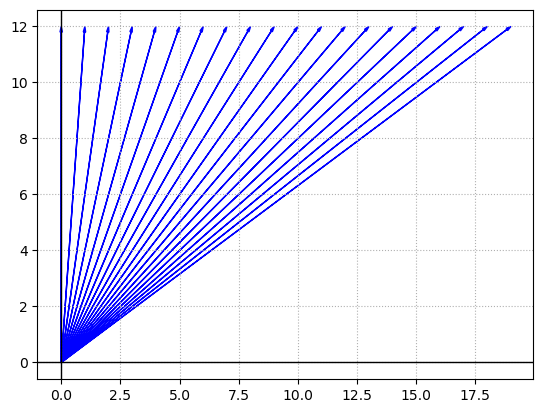

In [14]:
#not currently correct.
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

m = 0
while (m < 20):
    X = A@X
    X = X/lag.Magnitude(X)
    ax.arrow(0,0,m,lag.Magnitude(A@X),fc='b',ec='b',**options)
    m = m + 1


ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

($c$) Apply the Inverse Power Method with a shift of $\mu = 10$.  Explain why the results differ from those in the example.

In [15]:
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
I = np.eye(3)
mu = 10
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))

Eigenvector is approximately:
[[-7.07113254e-01]
 [-1.94211789e-05]
 [ 7.07100308e-01]] 

Eigenvalue of A is approximately:
11.999972530202639


By using a shift of $\mu = 10$, we find a eigenvalue of 12 because the shifted power method allows us to use the inverse power method to approximate the eigenvalue that lies closest to $\mu$. Since our largest eigenvalue is 12 and our smallest eigenvalue is 3, we should want to pick a $\mu$ in between these two eigenvalues to find the middle eigenvalue.

($d$) Apply the Inverse Power Method with a shift of $\mu = 7.5$ and the initial vector given below.  Explain why the sequence of vectors approach the eigenvector corresponding to $\lambda_1$

$$
\begin{equation}
X^{(0)} = \left[ \begin{array}{r} 1 \\ 0  \\ 0 \end{array}\right]
\end{equation}
$$

In [17]:
X = np.array([[1],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
I = np.eye(3)
mu = 7.5
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))

Eigenvector is approximately:
[[ 1.]
 [-0.]
 [-0.]] 

Eigenvalue of A is approximately:
10.816653826391969


Even with $\mu$ closest to $\lambda_2$, our shifted inverse power method approaches the eigenvector corresponding to $\lambda_1$ because our inital vector of $X$ contains values that are stronger for $\lambda_1$. This shows that our initial vector is also important with our chosen $\mu$ for finding the eigenvalue of choice.

**Exercise 2:** Let $B$ be the following matrix.

$$
\begin{equation}
B = \left[ \begin{array}{rrrr} -2 & -18 & 6 \\ -11 & 3 & 11 \\ -27 & 15 & 31 \end{array}\right]
\end{equation}
$$

($a$) Apply the Power Method and Inverse Power Method with shifts to approximate all eigenvalues of the matrix $B$. (*Note that one of the eigenvalues of this matrix is negative.*)

In [18]:
import numpy as np
import laguide as lag

#estimating largest eigenvalue first with the power method
print("Power Method for largest eigenvalue\n")

A = np.array([[-2, -18, 6],[-11, 3, 11],[-27, 15, 31]])
X = np.array([[1],[0],[0]])

m = 0
while (m < 20):
    X = A@X
    X = X/lag.Magnitude(X)
    m = m + 1
    
print("X =\n", X, "\n")

print(lag.Magnitude(A@X))

print("\nestimate for eigenvalue is 36\n")

print(A@X - 36*X, "\n")

print("The difference is relativley small so 36 is likely a close estimate for the largest eigenvalue\n")

X = np.array([[0],[0],[1]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A@X
difference = Y - lag.Magnitude(Y)*X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))
print("\nPrinting A@X to check for directionality:")
print(A@X)
print("A@X lives in a positive quadrant meaning a positive eigenvalue")

print("\nsecond run gives an answer close to 36 as well so λ1 = 36\n\n")

#estimating the lowest eigenvalue now with inverse power method
print("Inverse Power Method for smallest eigenvalue\n")

X = np.array([[0],[0],[1]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
A_inv = lag.Inverse(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = A_inv@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(A_inv@X),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')

print("estimated smallest eigenvalue is 4\n")

import scipy.linalg as sla

X = np.array([[0],[0],[1]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
LU_factorization = sla.lu_factor(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1
  
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(sla.lu_solve(LU_factorization,X)),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')
print("Printing A@X to check for directionality:")
print(A@X)
print("A@X lives in a positive quadrant meaning a positive eigenvalue\n")

print("second run gives a similar estimate of the eigenvalue being 4, so λ3 = 4\n\n")

#lastly, estimating middle eigenvalue by shifting the diagonal by the average of the highest and lowest eigenvalues
print("finally, Shifted Inverse Power Method to find the middle eigenvalue using the two eigenvalues found previously for 𝜇\n")
print("the largest eigenvalue is 36 and the smallest is 4, the average of the two is 20, so 𝜇 = 20\n")

X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

I = np.eye(3)
mu = 20
#running the inverse matrix rather than the normal matrix because the problem states that there is a 
#negative eigenvalue and it has not been found yet. In the above examples of how to use inverse power method 
#it said the smallest eigenvalue can be found using power method on a inverted matrix and since the inverted power 
#method did not find the negative value it has to be this method that finds it, and since this is just a modified
#inverse power method it should work to find the negative eigenvalue using the inverted matrix (hopefully)
Shifted_A = lag.Inverse(A-mu*I)
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))
print("\nPrinting A@X to check for directionality:")
print(A@X)
print("A@X lives in a negative quadrant meaning the eigenvalue should be negative\n")

print("middle eigenvalue is λ2 = -8\n")

print("giving the final eigenvalues of λ1 = 36, λ2 = -8, and λ3 = 4")

Power Method for largest eigenvalue

X =
 [[ 5.45551258e-14]
 [-3.16227766e-01]
 [-9.48683298e-01]] 

36.00000000000151

estimate for eigenvalue is 36

[[-2.40030218e-12]
 [-1.19904087e-12]
 [-1.20081722e-12]] 

The difference is relativley small so 36 is likely a close estimate for the largest eigenvalue

Eigenvector is approximately:
[[8.37460912e-07]
 [3.16228016e-01]
 [9.48683215e-01]] 

Magnitude of the eigenvalue is approximately:
35.99997669095833 

Magnitude of the difference is:
3.861628708405507e-05

Printing A@X to check for directionality:
[[-6.68009756e-06]
 [ 1.13841902e+01]
 [ 3.41525773e+01]]
A@X lives in a positive quadrant meaning a positive eigenvalue

second run gives an answer close to 36 as well so λ1 = 36


Inverse Power Method for smallest eigenvalue

Eigenvector is approximately:
[[ 7.07095991e-01]
 [-2.15801743e-05]
 [ 7.07117571e-01]] 

Magnitude of the eigenvalue of A inverse is approximately:
0.2500171668580304 

Magnitude of the eigenvalue of A is approxim

($b$) Check your results using the $\texttt{eig}$ function in SciPy.

In [19]:
print(sla.eigvals(A))

[36.+0.j -8.+0.j  4.+0.j]


## Applications: Discrete Dynamical Systems

In this second section, we recall that eigenvalues and eigenvectors provide the key to understanding the long-term behavior, or evolution, of a dynamical system described by a difference equation $x_{k+1} = Ax_k.$ Read Lay, section 5.6 for more details.

**Exercise 3:** Produce the general solution of the dynamical system $x_{k+1}=Ax_k$ when $A$ is the stochastic matrix for the Hertz Rent-A-Car model in Denver. Assume that the company has a fleet of about 2000 cars. The pattern of rental and return locations is given by the factions in the table below. On a typical day, about how many cars will be rented or ready to rent from the downtown location where

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} .90 & .01 & .09 \\ .01 & .90 & .01 \\ .09 & .09 & .90 \end{array}\right]
\end{equation}
$$

where columns represent cars rented from DIA, downtown, local airport, respectively, and the rows represent cars returned to DIA, downtown, local airport, respectively.


In [20]:
## Code solution here.

A = np.array([[.90, .01, .09],[.01, .90, .01],[.09, .09, .90]])
print('A =\n', A, '\n')

# Computing Eigenvalues and Eigenvectors
evalues,evectors = sla.eig(A)
#print(evalues) # Testing
#print(evectors) # Testing

E_1 = evalues[0]
E_2 = evalues[1]
E_3 = evalues[2]

V_1 = evectors[:,0:1]
V_2 = evectors[:,1:2]
V_3 = evectors[:,2:3]

#print('E_1 =\n', E_1, '\n')
#print('E_2 =\n', E_2, '\n')
#print('E_3 =\n', E_3, '\n')

#print('V_1 =\n', V_1, '\n')
#print('V_2 =\n', V_2, '\n')
#print('V_3 =\n', V_3, '\n')

###############################################################

def generalSolution(X,k):
    # X_0        = c_1v_1 + c_2v_2 + c_3v_3
    # X_1 = AX_0 = A(c_1v_1 + c_2v_2 + c_3v_3)
    # X_0 = AX_1 = A(c_1(E_1)v_1 + c_2(E_2)v_2 + c_3(E_3)v_3)
    # X_k = c_1(E_1^k)v_1 + c_2(E_2^k)v_2 + c_3(E_3^k)v_3)
    C_1 = X[0]
    C_2 = X[1]
    C_3 = X[2]
    
    X_k = C_1*np.power(E_1,k)*V_1 + C_2*np.power(E_2,k)*V_2 + C_3*np.power(E_3,k)*V_3
    print('X_k = \n', X_k)
    
X_0 = [0,2000,0]
generalSolution(X_0, 2)

A =
 [[0.9  0.01 0.09]
 [0.01 0.9  0.01]
 [0.09 0.09 0.9 ]] 

X_k = 
 [[-9.27865518e+02+0.j]
 [-4.00281817e-13+0.j]
 [ 9.27865518e+02+0.j]]


**Exercise 4:** Construct a stage-matrix model for an animal species that has two life stages: juvenile (up to 1 year old) and adult. Suppose the female adults give birth each year to an average of 1.6 female juveniles. Each year, 30% of the juveniles survive to become adults and 80% of the adults survive. For $k\geq 0,$ let $x_k=(j_k, a_k),$ where the entries in $x_k$ are the numbersof female juveniles and female adults in year $k.$

($a$) Construct the stage-matrix $A$ such that $x_{k+1} = Ax_k$ for $k \geq 0.$

In [21]:
## Code solution here.

($b$)  Show that the population is growing, compute the even- tual growth rate of the population, and give the eventual ratio of juveniles to adults.

In [22]:
## Code solution here.

($c$)  Suppose that initially there are 15 juveniles and 10 adults in the population. Produce four graphs that show how the population changes over eight years: (1) the number of juveniles, (2) the number of adults, (3) the total population, and (4) the ratio of juveniles to adults (each year). Further, when does the ratio in (4) seem to stabilize? 

In [23]:
## Code solution here.

**Exercise 5:** A herd of American buffalo (bison) can be modeled by a stage matrix similar to that for the spotted owls. The females can be divided into calves (up to 1 year old), yearlings (1 to 2 years), and adults. Suppose an average of 42 female calves are born each year per 100 adult females. (Only adults produce offspring.) Each year, about 60% of the calves survive, 75% of the yearlings survive, and 95% of the adults survive. For $k\geq 0,$ let $x_k=(c_k, y_k, a_k)$, where the entries in $x_k$ are the numbers of females in each life stage at year $k.$


($a$)  Construct the stage-matrix $A$ for the buffalo herd, such that $x_{k+1}=Ax_k$ for $k\geq 0.$

In [24]:
import numpy as np
import laguide as lag
import scipy.linalg as sla

print("Ck = (0)Ck + (0)Yk + (.42)Ak\n")
print("Yk = (.6)Ck + (1)Yk + (0)Ak\n")
print("Ak = (0)Ck + (.75)Yk + (.95)Ak\n")

A = np.array(([[0, 0, .42],[.6, 1, 0],[0, .75, .95]]))

print("A =\n", A, "\n")

Ck = (0)Ck + (0)Yk + (.42)Ak

Yk = (.6)Ck + (1)Yk + (0)Ak

Ak = (0)Ck + (.75)Yk + (.95)Ak

A =
 [[0.   0.   0.42]
 [0.6  1.   0.  ]
 [0.   0.75 0.95]] 



($b$)  Show that the buffalo herd is growing, determine the expected growth rate after many years, and give the expected numbers of calves and yearlings present per 100 adults.

In [41]:
λ, v = np.linalg.eig(A)

print("eigenvalues: ", λ, "\n")
print("eigenvectors: \n", v, "\n")

print("x0 = c1v1 + c2v2 + c3v3\n")

v1 = np.array(([[v[0][0]],[v[1][0]],[v[2][0]]]))

v2 = np.array(([[v[0][1]],[v[1][1]],[v[2][1]]]))

v3 = np.array(([[v[0][2]],[v[1][2]],[v[2][2]]]))

print("xk = c1(", λ[0], ")^k *\n", v1, "\n\n + c2(", λ[1], ")^k *\n", v2, "\n\n + c3(", λ[2], ")^k *\n", v3, "\n")

print("as k approches infinity λ1 and λ2 will approach 0 because they are both less than zero, which will leave only:\n")

print("c3(", λ[2], ")^k *\n", v3, "\n")

print("this shows that the growth rate is positive as the corresponding eigenvalue is above one and will therefore not appraoch 0 and the corresponding eigenvector is not negative so it will not approach a negative value\n")

print("which leaves for larger values of k: \n x(k+1) = c3(", λ[2], ")^k+1 *\n", v3, "\n\nwhich then becomes: \n", λ[2], "c3(", λ[2], ")^k *\n", v3, "\n\n and then finally ends at: ", λ[2], "xk\n")

print("this means that the bison population will grow by 35% each year\n")

print("xk = c3", λ[2], "*\n", v3, "\n")

pop = λ[2] * v3

print("meaning the ending populations will be c3 times\n", pop, "\n")

print("meaning the ending population of calves will be about .36c3 and the ending population of adolescents will be about .45c3 with c3 being whatever the initial population is as that was never provided\n")

eigenvalues:  [0.3 +0.2236068j 0.3 -0.2236068j 1.35+0.j       ] 

eigenvectors: 
 [[ 0.63753558+0.j          0.63753558-0.j          0.26471698+0.j        ]
 [-0.495861  -0.15839699j -0.495861  +0.15839699j  0.45380054+0.j        ]
 [ 0.45538256+0.33942212j  0.45538256-0.33942212j  0.85087601+0.j        ]] 

x0 = c1v1 + c2v2 + c3v3

xk = c1( (0.30000000000000016+0.22360679774997907j) )^k *
 [[ 0.63753558+0.j        ]
 [-0.495861  -0.15839699j]
 [ 0.45538256+0.33942212j]] 

 + c2( (0.30000000000000016-0.22360679774997907j) )^k *
 [[ 0.63753558-0.j        ]
 [-0.495861  +0.15839699j]
 [ 0.45538256-0.33942212j]] 

 + c3( (1.3500000000000003+0j) )^k *
 [[0.26471698+0.j]
 [0.45380054+0.j]
 [0.85087601+0.j]] 

as k approches infinity λ1 and λ2 will approach 0 because they are both less than zero, which will leave only:

c3( (1.3500000000000003+0j) )^k *
 [[0.26471698+0.j]
 [0.45380054+0.j]
 [0.85087601+0.j]] 

this shows that the growth rate is positive as the corresponding eigenvalue is abo

## Final Discussion: 

Please provide a 250-300 word report on what you learned from this project. Provide any more details about the project and expand on your favorite part of the project. Include any other information you have about this.

In [ ]:
## Code solution here.

### References

- Burden, Richard L. et al. *Numerical Analysis*. 10th ed., Cengage Learning, 2014.
- Golub, Gene H. and Charles F. Van Loan. *Matrix Computations*., The Johns Hopkins University Press, 1989.
- Lay, David C. et al. *Linear Algebra and its Applications*., 5th ed., Pearson, 2016. 
